# Introducción a Modelos Generativos

Este cuaderno te guiará por una demostración **muy sencilla** de cómo funcionan algunos de los modelos generativos más conocidos: GPT, BERT, GAN y Stable Diffusion. No necesitas conocimientos previos de Inteligencia Artificial.

## 📘 GPT: Generador de texto
GPT es un modelo que genera texto palabra por palabra, como si completara una oración.

In [ ]:


from transformers import pipeline

generator = pipeline('text-generation', model='datificate/gpt2-small-spanish')

text = generator("La inteligencia artificial en la educación es", max_length=30, truncation=True)
print(text[0]['generated_text'])

Device set to use cuda:0


La inteligencia artificial en la educación es generalmente necesaria si se desea lograr una buena gestión de las capacidades físicas en la vida diaria. Se ha mencionado tradicionalmente que


## 🔍 BERT: Entiende el texto (no genera)
BERT sirve para tareas como clasificación o completar huecos en una frase.

In [ ]:
from transformers import pipeline

fill_mask = pipeline("fill-mask", model="bert-base-uncased")
fill_mask("The capital of France is [MASK].")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


[{'score': 0.4167884886264801,
  'token': 3000,
  'token_str': 'paris',
  'sequence': 'the capital of france is paris.'},
 {'score': 0.07141659408807755,
  'token': 22479,
  'token_str': 'lille',
  'sequence': 'the capital of france is lille.'},
 {'score': 0.0633925125002861,
  'token': 10241,
  'token_str': 'lyon',
  'sequence': 'the capital of france is lyon.'},
 {'score': 0.044447433203458786,
  'token': 16766,
  'token_str': 'marseille',
  'sequence': 'the capital of france is marseille.'},
 {'score': 0.03029710426926613,
  'token': 7562,
  'token_str': 'tours',
  'sequence': 'the capital of france is tours.'}]

## 🎨 Stable Diffusion (Imágenes desde texto)
Este ejemplo no funciona en notebooks simples sin GPU, pero mostraremos cómo se hace conceptualmente.

In [ ]:
# Instalar dependencias necesarias
!pip install diffusers transformers accelerate safetensors --upgrade


In [ ]:
# Importar librerías
from diffusers import StableDiffusionPipeline
import torch

In [ ]:
# Cargar el modelo desde Hugging Face (requiere GPU y 4-6 GB VRAM libres)
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

# Generar imagen desde texto
prompt = "A futuristic city at sunset"
image = pipe(prompt).images[0]

# Mostrar imagen
image.show()

# Guardar imagen en el sistema de archivos
image.save("city.png")

print("Este modelo genera imágenes a partir de texto usando un proceso llamado difusión.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Este modelo genera imágenes a partir de texto usando un proceso llamado difusión.


## 🎭 GANs: Dos redes que aprenden a engañarse
Una red genera imágenes y la otra intenta detectar si son falsas. Esto requiere más código y recursos, pero puedes ver ejemplos en https://thispersondoesnotexist.com/

In [ ]:
# 👾 Simple GAN para generar dígitos (MNIST)
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Parámetros
batch_size = 64
z_dim = 100
epochs = 20
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Dataset MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(mnist, batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.03MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 242kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.65MB/s]


In [ ]:
# Generador
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z).view(-1, 1, 28, 28)

In [ ]:
# Discriminador
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
G = Generator().to(device)
D = Discriminator().to(device)

In [ ]:
loss_fn = nn.BCELoss()
opt_G = torch.optim.Adam(G.parameters(), lr=0.0002)
opt_D = torch.optim.Adam(D.parameters(), lr=0.0002)

Epoch 1/20 | Loss D: 0.8309 | Loss G: 1.0373
Epoch 2/20 | Loss D: 1.4872 | Loss G: 0.7143
Epoch 3/20 | Loss D: 0.7795 | Loss G: 1.2687
Epoch 4/20 | Loss D: 1.1189 | Loss G: 0.9421
Epoch 5/20 | Loss D: 1.1723 | Loss G: 0.8266


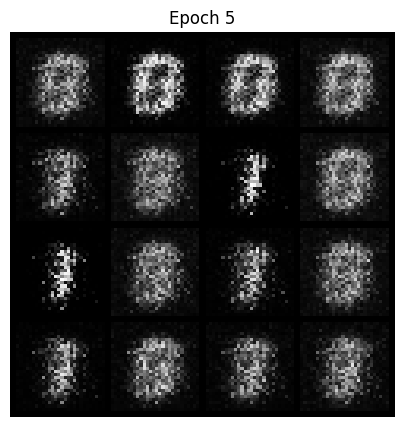

Epoch 6/20 | Loss D: 1.4449 | Loss G: 0.7650
Epoch 7/20 | Loss D: 1.0269 | Loss G: 1.0801
Epoch 8/20 | Loss D: 0.9371 | Loss G: 1.0340
Epoch 9/20 | Loss D: 1.1455 | Loss G: 0.9855
Epoch 10/20 | Loss D: 1.0948 | Loss G: 0.9965


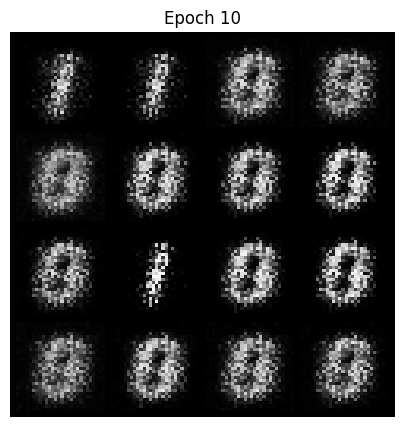

Epoch 11/20 | Loss D: 1.0383 | Loss G: 1.1107
Epoch 12/20 | Loss D: 1.0310 | Loss G: 1.0494
Epoch 13/20 | Loss D: 0.7671 | Loss G: 1.3707
Epoch 14/20 | Loss D: 0.8625 | Loss G: 1.1426
Epoch 15/20 | Loss D: 1.2720 | Loss G: 0.9358


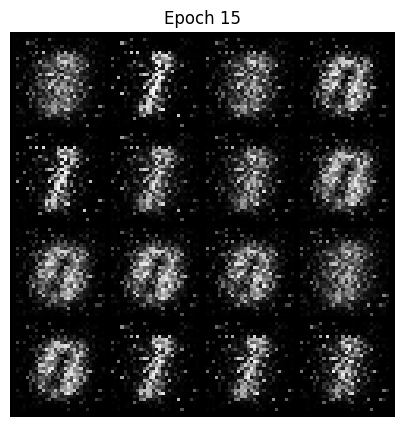

Epoch 16/20 | Loss D: 0.7721 | Loss G: 1.6589
Epoch 17/20 | Loss D: 0.3911 | Loss G: 1.9597
Epoch 18/20 | Loss D: 1.0684 | Loss G: 1.4698
Epoch 19/20 | Loss D: 0.4235 | Loss G: 1.8326
Epoch 20/20 | Loss D: 0.6968 | Loss G: 1.6383


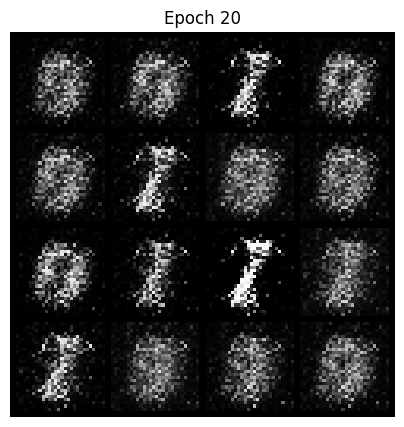

In [ ]:
# Entrenamiento
for epoch in range(epochs):
    for real, _ in dataloader:
        real = real.to(device)
        batch_size = real.size(0)

        # Etiquetas reales y falsas
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # === Discriminador ===
        z = torch.randn(batch_size, z_dim).to(device)
        fake = G(z)

        D_real = D(real)
        D_fake = D(fake.detach())

        loss_D = loss_fn(D_real, real_labels) + loss_fn(D_fake, fake_labels)
        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # === Generador ===
        D_fake = D(fake)
        loss_G = loss_fn(D_fake, real_labels)
        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    print(f"Epoch {epoch+1}/{epochs} | Loss D: {loss_D.item():.4f} | Loss G: {loss_G.item():.4f}")

    # Mostrar imágenes cada 5 épocas
    if (epoch + 1) % 5 == 0:
        with torch.no_grad():
            z = torch.randn(16, z_dim).to(device)
            samples = G(z).cpu().view(-1, 28, 28)
            grid = torchvision.utils.make_grid(samples.unsqueeze(1), nrow=4, normalize=True)
            plt.figure(figsize=(5,5))
            plt.imshow(grid.permute(1, 2, 0).squeeze())
            plt.axis('off')
            plt.title(f"Epoch {epoch+1}")
            plt.show()

## ✅ Conclusión
¡Has visto ejemplos básicos de cómo se usan los modelos generativos más famosos! ¿Cuál te parece más interesante para la educación?